# PCA

Understanding PCA with a Simple Dataset
Objective: To understand the basic principles of PCA by reducing the dimensionality of a simple dataset.


In [33]:
# Step 1: Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


In [34]:
# Step 2: Load the dataset from the given path
data = pd.read_csv('/content/iris.csv')


In [35]:
# Step 3: Exploratory Data Analysis (EDA)
# Look at the first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())

# Extract features and labels
X = data.iloc[:, :-1].values  # Features (first 4 columns)
y = data.iloc[:, -1].values   # Labels (last column)


First few rows of the dataset:
   Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [36]:
# Step 4: Standardize the dataset
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
print("\nStandardized Features (first 5 rows):")
print(X_std[:5])



Standardized Features (first 5 rows):
[[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-1.02184904  1.24920112 -1.34022653 -1.3154443 ]]


In [37]:
# Step 5: Compute the covariance matrix
cov_matrix = np.cov(X_std.T)
print("\nCovariance Matrix:")
print(cov_matrix)



Covariance Matrix:
[[ 1.00671141 -0.11835884  0.87760447  0.82343066]
 [-0.11835884  1.00671141 -0.43131554 -0.36858315]
 [ 0.87760447 -0.43131554  1.00671141  0.96932762]
 [ 0.82343066 -0.36858315  0.96932762  1.00671141]]


In [38]:
# Step 6: Compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)


In [39]:
# Step 7: Sort the eigenvalues and corresponding eigenvectors
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

# Print eigenvalues and eigenvectors
print("\nEigenvalues:")
print(eigenvalues)

print("\nEigenvectors:")
print(eigenvectors)



Eigenvalues:
[2.93808505 0.9201649  0.14774182 0.02085386]

Eigenvectors:
[[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]


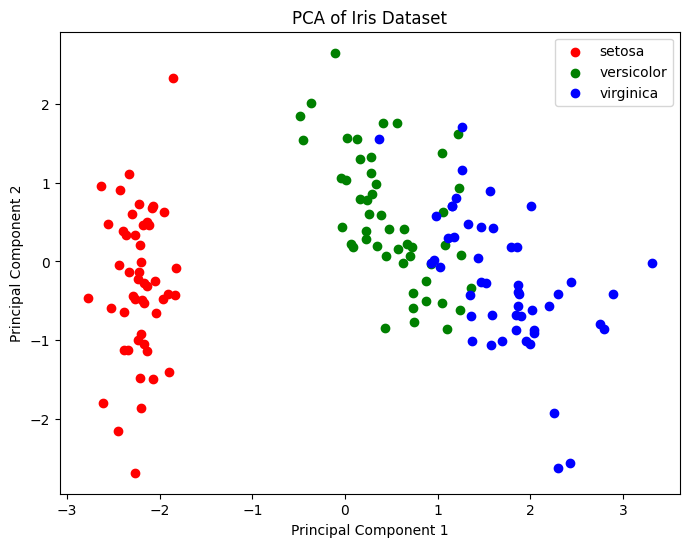

In [40]:
# Step 8: Project the data onto the first two principal components
X_pca = X_std.dot(eigenvectors[:, :2])

# Step 9: Visualization
# Create a scatter plot with different colors for each class
plt.figure(figsize=(8, 6))
for label, color in zip(np.unique(y), ['r', 'g', 'b']):
    plt.scatter(X_pca[y == label, 0], X_pca[y == label, 1], label=label, color=color)
plt.title('PCA of Iris Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

 PCA for Feature Reduction in a Classification Task
Objective: Apply PCA as a preprocessing step to reduce the feature space for a classification problem and compare its effect on model performance.


In [41]:
# Step 1: Load libraries
import numpy as np
import pandas as pd
import zipfile
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt


In [42]:
# Step 2: Unzip and load the dataset
with zipfile.ZipFile("/content/archive (1).zip", 'r') as zip_ref:
    zip_ref.extractall('/content/')

# Assuming the CSV file is named 'winequality.csv' after extraction
wine_data = pd.read_csv('/content/winequality-red.csv')


In [43]:
# Step 3: Separate features and target (based on the 'quality' column)
X = wine_data.drop('quality', axis=1)  # Features
y = wine_data['quality']  # Target


In [44]:
# Step 4: Split the dataset (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [45]:
# Step 5: Baseline Model without PCA (Logistic Regression with class balancing)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Logistic Regression without PCA, with class balancing
log_reg = LogisticRegression(max_iter=10000, class_weight='balanced')
log_reg.fit(X_train_scaled, y_train)

# Evaluate the baseline model
y_pred_baseline = log_reg.predict(X_test_scaled)
baseline_accuracy = accuracy_score(y_test, y_pred_baseline)
baseline_precision = precision_score(y_test, y_pred_baseline, average='weighted', zero_division=1)
baseline_recall = recall_score(y_test, y_pred_baseline, average='weighted')

print(f"Baseline Model - Accuracy: {baseline_accuracy:.4f}, Precision: {baseline_precision:.4f}, Recall: {baseline_recall:.4f}")


Baseline Model - Accuracy: 0.4208, Precision: 0.5774, Recall: 0.4208


In [46]:
# Step 6: Apply PCA and evaluate model performance with different components
components = [2, 5, 10]
accuracies = []
precisions = []
recalls = []

for n_comp in components:
    # Apply PCA
    pca = PCA(n_components=n_comp)
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)

    # Train Logistic Regression on reduced features with class balancing
    log_reg_pca = LogisticRegression(max_iter=10000, class_weight='balanced')
    log_reg_pca.fit(X_train_pca, y_train)

    # Evaluate model performance
    y_pred_pca = log_reg_pca.predict(X_test_pca)
    accuracy = accuracy_score(y_test, y_pred_pca)
    precision = precision_score(y_test, y_pred_pca, average='weighted', zero_division=1)
    recall = recall_score(y_test, y_pred_pca, average='weighted')

    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)

    print(f"PCA with {n_comp} components - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}")


PCA with 2 components - Accuracy: 0.2583, Precision: 0.4951, Recall: 0.2583
PCA with 5 components - Accuracy: 0.3833, Precision: 0.5671, Recall: 0.3833
PCA with 10 components - Accuracy: 0.4000, Precision: 0.5609, Recall: 0.4000


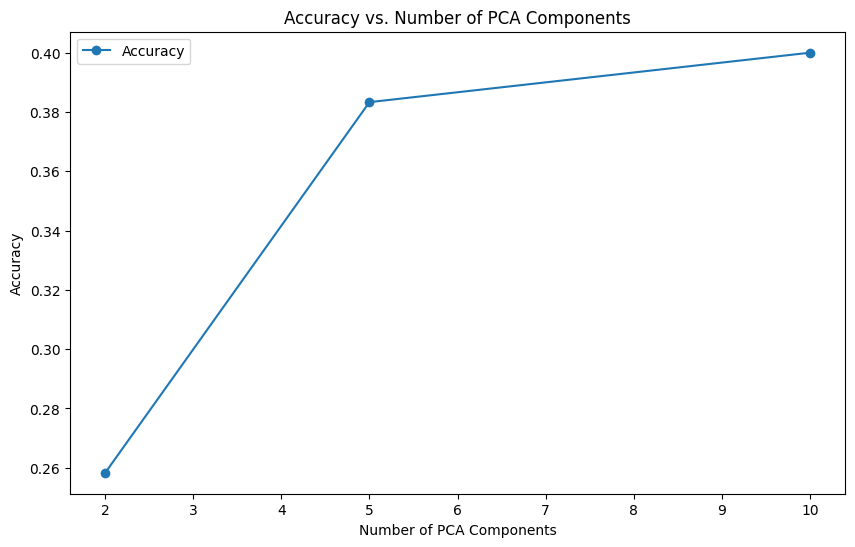

In [47]:
# Step 7: Visualization - Accuracy vs. Number of Components
plt.figure(figsize=(10, 6))
plt.plot(components, accuracies, marker='o', label='Accuracy')
plt.xlabel('Number of PCA Components')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of PCA Components')
plt.legend()
plt.show()

 PCA for Image Compression
Objective: Use PCA to compress and then reconstruct an image, demonstrating the power of dimensionality reduction in data compression.


In [48]:
from google.colab import files
from skimage import io, color
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [49]:
# Step 1: Upload the image
uploaded = files.upload()

# Step 2: Load the grayscale image
image = io.imread('/content/image.jpeg', as_gray=True)
print("Original image shape:", image.shape)


Saving image.jpeg to image (2).jpeg
Original image shape: (236, 214)


In [50]:
# Step 3: Reshape the image to a 2D array (flatten it)
X = image.reshape(-1, image.shape[1])
print("Flattened image shape:", X.shape)

Flattened image shape: (236, 214)


In [51]:
import time

# Measure time for PCA compression
start_time = time.time()
X_reconstructed = pca_compression(X_train_scaled, n_components=5)  # Example with 5 components
end_time = time.time()

print(f"PCA compression took {end_time - start_time:.2f} seconds")


PCA compression took 0.00 seconds


In [52]:
# Step 4: Apply PCA and reduce dimensionality
def pca_compression(X, n_components):
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X)
    X_reconstructed = pca.inverse_transform(X_pca)
    return X_reconstructed

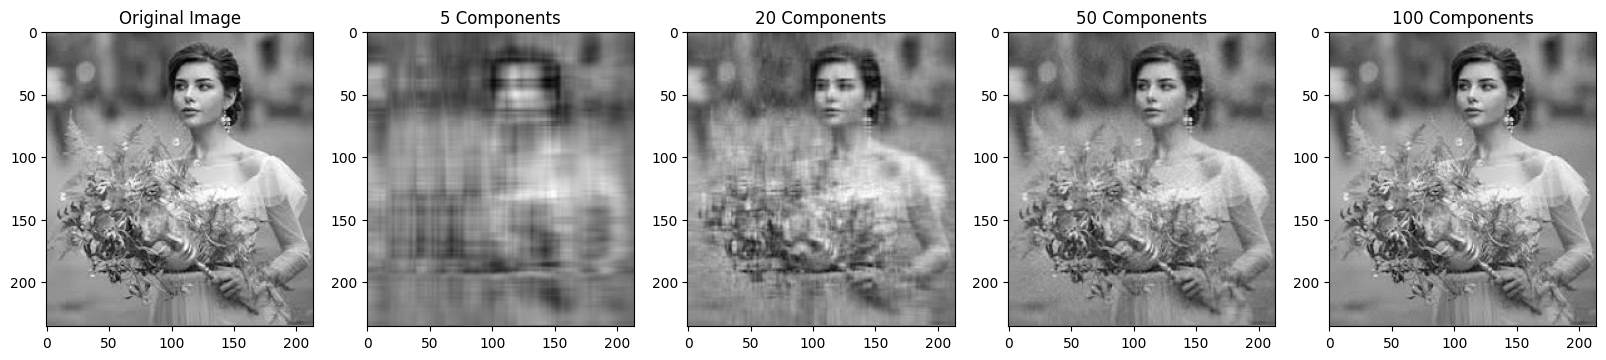

In [53]:
# Step 5: Reconstruct the image with different components
components = [5, 20, 50, 100]
fig, ax = plt.subplots(1, len(components)+1, figsize=(20, 5))

# Show the original image
ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original Image')

# Reconstruct and display images with different components
for i, n_comp in enumerate(components):
    X_reconstructed = pca_compression(X, n_comp)
    reconstructed_image = X_reconstructed.reshape(image.shape)

    ax[i+1].imshow(reconstructed_image, cmap='gray')
    ax[i+1].set_title(f'{n_comp} Components')

plt.show()
